#IMPORTING LIBRARIES


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#IMPORTING DATASET

In [3]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#ANALYZING DATASET

In [4]:
x_train.shape       #there are 50000 training samples and each sample is 32x32 image and there are 3 is for rgb channels

(50000, 32, 32, 3)

In [5]:
x_test.shape        #in testing set there are 10000 images

(10000, 32, 32, 3)

In [6]:
y_train.shape       #there are 50000 samples and 1 dimensional array

(50000, 1)

In [7]:
y_train[:5]        #inorder to see first 5 samples where 6 is frog 9 is truck etc

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#RESHAPING DATASET

In [8]:
y_train=y_train.reshape(-1,)      #to reshpae the y train to a categorical row. We want 1000 to be there so -1 and want to flaten it so simply (,)
y_train[:6]                       #instead of 2d array now its 1d array

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[0]

'airplane'

#PLOTTING IMAGES

In [11]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


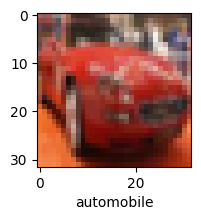

In [12]:
plot_sample(x_train, y_train, 5)        #here index 5 will be taken by y_train, and in 5th index of y_train there is 1 and in 1 there is automobile

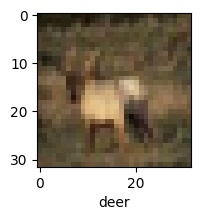

In [13]:
plot_sample(x_train, y_train, 3)

#NORMALIZING X_TEST AND X_TRAIN

In [14]:
x_train[:3]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
x_train=x_train/255     #as the values lies in a range of 1 to 255, inorder to make the values in the range of (0,1) we divide it by 255
x_test=x_test/255

In [16]:
x_train[:3]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

#TRANING IMAGES USING CNN

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#RUNNING EPOCHS

In [19]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4820 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1475 - accuracy: 0.5975
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0232 - accuracy: 0.6436
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9410 - accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8803 - accuracy: 0.6958
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8278 - accuracy: 0.7134
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7850 - accuracy: 0.7287
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7457 - accuracy: 0.7421
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7086 - accuracy: 0.7507
Epoch 10/10
1563/1563 [==============================] - 56s 36m

#GETTING ACCURACY SCORE

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9602 - accuracy: 0.6844


[0.9601547718048096, 0.6844000220298767]

In [21]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[8.8101922e-04, 9.8057382e-04, 3.1840994e-03, 2.2199790e-01,
        1.6293938e-04, 1.6521852e-02, 6.3858199e-04, 6.9916801e-05,
        7.4605989e-01, 9.5032323e-03],
       [5.9374707e-04, 8.0795896e-01, 4.5293362e-08, 1.1110044e-07,
        9.9550141e-07, 1.6176475e-09, 2.0771699e-07, 6.0393859e-09,
        1.9128309e-01, 1.6286374e-04],
       [6.9081105e-02, 5.0798035e-01, 9.7283766e-05, 8.6504156e-03,
        2.8356817e-03, 2.3182176e-04, 4.6808831e-04, 1.9329732e-03,
        3.9114814e-02, 3.6960745e-01],
       [9.2051417e-01, 1.9504714e-03, 4.0596168e-02, 1.0559097e-03,
        6.9168387e-03, 4.8043519e-05, 7.0403173e-04, 1.1029153e-03,
        2.6897786e-02, 2.1360995e-04],
       [7.9097617e-06, 2.7299274e-04, 9.3350736e-03, 2.7543236e-02,
        7.1886897e-02, 4.3352568e-03, 8.8628703e-01, 5.8318419e-06,
        3.2095436e-04, 5.0173994e-06]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 1, 1, 0, 6]

In [23]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [24]:
y_test=y_test.reshape(-1,)      #to reshpae the y train to a categorical row. We want 1000 to be there so -1 and want to flaten it so simply (,)
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

#TESTING OUR MODEL

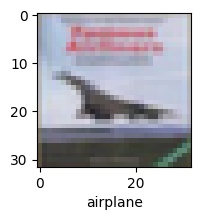

In [35]:
plot_sample(x_test, y_test,3)

In [36]:
classes[y_classes[3]]

'airplane'

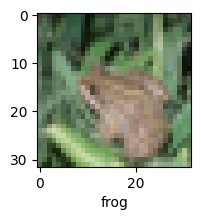

In [37]:
plot_sample(x_test, y_test,4)

In [38]:
classes[y_classes[4]]

'frog'